In [1]:
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import math

from tqdm import tqdm_notebook
from collections import Counter
from glob import glob

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
PATH = '../'

PROCESSED_DATA_PATH = os.path.join(PATH, 'data/processed/')

DF_FAKE_PATH = glob(PROCESSED_DATA_PATH + '*')[0]
DF_LEGIT_PATH = glob(PROCESSED_DATA_PATH + '*')[1]

In [3]:
df_fake = pkl.load(open(DF_FAKE_PATH, 'rb'))

df_legit = pkl.load(open(DF_LEGIT_PATH, 'rb'))

In [4]:
df = pd.concat((df_fake, df_legit), axis=0)

In [5]:
classes = [True, False]

In [6]:
df['TEXT_LEN_CHAR'] = df['TEXT_CLEAN'].apply(len)
df['TEXT_LEN_TOKEN'] = df['TEXT_CLEAN'].apply(str.split).apply(len)
df['TITLE_LEN_CHAR'] = df['TITLE_CLEAN'].apply(len)
df['TITLE_LEN_TOKEN'] = df['TITLE_CLEAN'].apply(str.split).apply(len)

In [7]:
df.head()

,DATE,FAKE,TEXT_CLEAN,TITLE_CLEAN,TEXT_LEN_CHAR,TEXT_LEN_TOKEN,TITLE_LEN_CHAR,TITLE_LEN_TOKEN
0,26/04/2019,True,comica nojenta cena aconteceu ultima terca fei...,maria rosario perde dentadura durante votacao ...,262,32,72,9
1,22/04/2019,True,finalmente professoraheleypresente reuniao min...,bolsonaro condecorou professora heley abreu he...,739,82,60,7
2,24/04/2019,True,audiencia ser grande hoje horario brasilia rec...,hoje record vai entrevistar bolsonaro minutos,163,21,45,6
3,25/04/2019,True,ibaneis rocha governador distrito federal fica...,ibaneis rocha governador viaja bebado vexame a...,1053,131,50,7
4,21/04/2019,True,mandou dinheiro narcotrafico rio farc sequestr...,marcelo odebrecht diz governo deu dinheiro tra...,430,49,63,9


In [8]:
all_cnt = {}
for key in tqdm_notebook(classes):
    cnt = Counter()
    for text in tqdm_notebook(df[df['FAKE'] == key]['TEXT_CLEAN']):
        cnt += Counter(set(str(text).split()))

    all_cnt[key] = cnt.most_common()

In [9]:
def get_from_sublist(wrd, counter):
    lst = [elem[0] for elem in counter]
    if wrd in lst:
        return True, counter[lst.index(wrd)][1]
    return False, -1
        

In [10]:
n = 10
for key1 in all_cnt:
    print('========== {} ========== '.format(key1))
    total = len(df[df['FAKE'] == key1]['TEXT_CLEAN'])
    for wrd in all_cnt[key1][:n]:
        print('{}: {}/{} ({}%)'.format(wrd[0].upper(), wrd[1], total, round(wrd[1]/total * 100, 2)))
        lst = []
        for key2 in all_cnt:
            cond, val = get_from_sublist(wrd[0], all_cnt[key2])
            if key1 != key2 and cond:
                lst.append((wrd[0], val, key2))
        for item in sorted(lst, key=lambda x: -x[1]):
            print(' - {} documentos em {}'.format(item[1], item[2]))
                
        print()
    print()

========== True ========== 
BRASIL: 307/1153 (26.63%)
 - 5447 documentos em False

PRESIDENTE: 254/1153 (22.03%)
 - 10910 documentos em False

LULA: 241/1153 (20.9%)
 - 2239 documentos em False

BOLSONARO: 224/1153 (19.43%)
 - 1891 documentos em False

SER: 216/1153 (18.73%)
 - 10884 documentos em False

BOATO: 207/1153 (17.95%)
 - 35 documentos em False

VAI: 190/1153 (16.48%)
 - 4732 documentos em False

DIZ: 176/1153 (15.26%)
 - 4657 documentos em False

DILMA: 164/1153 (14.22%)
 - 3084 documentos em False

TODOS: 154/1153 (13.36%)
 - 6263 documentos em False


========== False ========== 
PRESIDENTE: 10910/15705 (69.47%)
 - 254 documentos em True

SER: 10884/15705 (69.3%)
 - 216 documentos em True

SOBRE: 9940/15705 (63.29%)
 - 140 documentos em True

FEIRA: 9537/15705 (60.73%)
 - 65 documentos em True

GOVERNO: 9461/15705 (60.24%)
 - 131 documentos em True

PAIS: 9100/15705 (57.94%)
 - 140 documentos em True

SEGUNDO: 9086/15705 (57.85%)
 - 85 documentos em True

AINDA: 9065/15705

In [11]:
def get_size(cls):
    return len(df[df['FAKE'] == cls])

1000
10


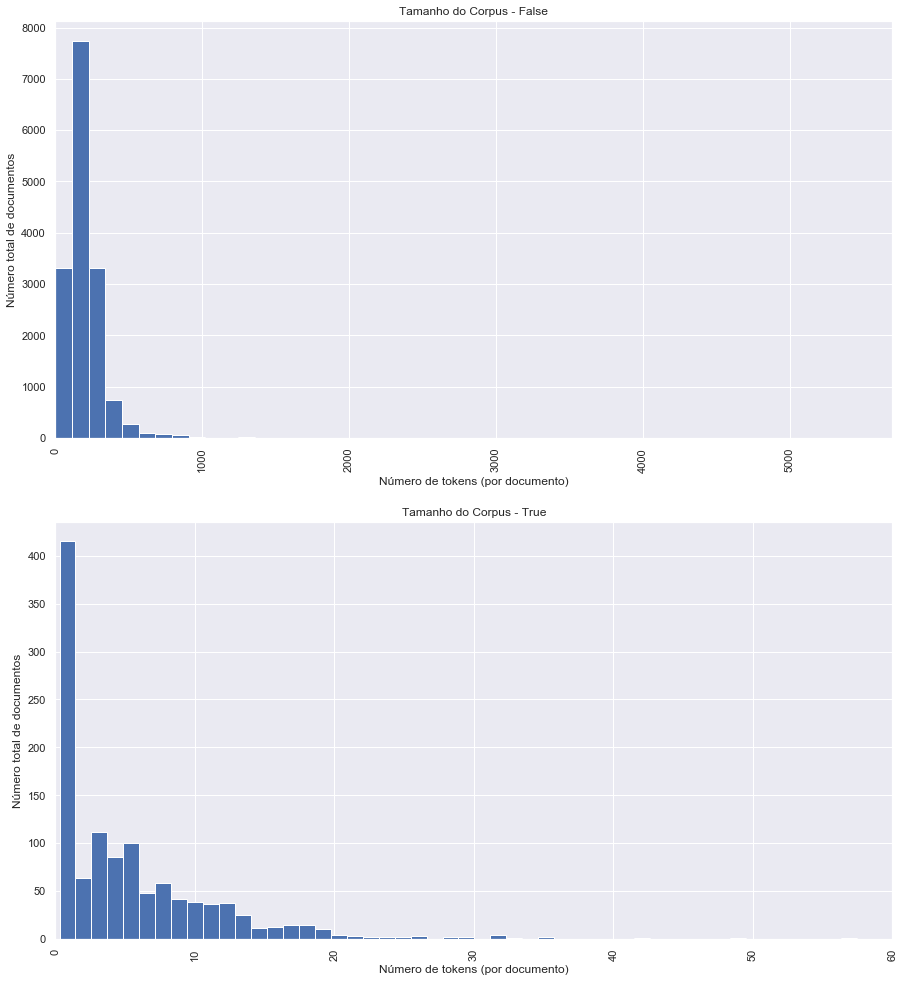

In [12]:

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
fig.subplots_adjust(top=1.4)
for i, cls in enumerate(sorted(classes, key=get_size, reverse=True)):
#     n_bins = 2 * len(set(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'].apply(lambda x: round(x / 100) * 100)))
    n_bins = 50
    x_min = math.floor(min(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
    x_max = math.ceil(max(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN']) / 100) * 100
    x_step = int(math.pow(10, math.ceil(math.log(math.floor((x_max - x_min) / 100), 10))))
    print(x_step)
    ax[i].set(xlim=(x_min, x_max))
    ax[i].hist(df[df['FAKE'] == cls]['TEXT_LEN_TOKEN'], bins=n_bins, align='mid')
    ax[i].set_xticklabels(range(x_min, x_max, x_step), rotation=90)
    
    ax[i].set_title('Tamanho do Corpus - {}'.format(cls))
    ax[i].set_xlabel('Número de tokens (por documento)');
    ax[i].set_ylabel('Número total de documentos');

In [16]:
min(df_fake['TEXT_CLEAN'].apply(str.split).apply(len))

3

In [23]:
df_fake['TEXT_CLEAN'].apply(str.split).apply(len).mean()

54.93235039028621

In [14]:
df_fake['TITLE_CLEAN'][0]

'maria rosario perde dentadura durante votacao reforma previdencia camara'